## Visualization of scraped data

We may use python's numpy, matplotlib for the same.

In [221]:
import matplotlib.pyplot as plt
import pandas as pd

hd = pd.read_csv("hospital_directory.csv")
state = pd.read_csv("state.csv")
dist = pd.read_excel("district.xlsx")

## Merging all the three tables for easy access

In [222]:
hd['district_id'] = hd['district_id'].astype(pd.Int64Dtype())
x = pd.merge(hd, dist, left_on='district_id', right_on='district_id', how='left')
full_merge = pd.merge(x, state, left_on='state_id', right_on='state_id', how='left')
full_merge

,hospital_id,hospital_name,address,district_id,pincode,latitude_x,longitude_x,mco_contact_number,total_beds,hospital_type,...,longitude_y,total_persons,total_males,total_females,children_persons,children_males,children_females,state_name,latitude,longitude
0,1,Chakraborty Multi Speciality Hospital,"Near Dollygunj Junction, South Andaman, Andama...",647,744101.0,11.635799,92.712058,03192 251971,NaN,NaN,...,92.487468,238142.0,127283.0,110859.0,24661.0,12523.0,12138.0,ANDAMAN AND NICOBAR ISLANDS,11.7401,92.6586
1,2,Inhs Dhanvantri,"Medical Board Office, South Andaman, Andaman a...",647,744101.0,11.831168,92.658640,0,NaN,NaN,...,92.487468,238142.0,127283.0,110859.0,24661.0,12523.0,12138.0,ANDAMAN AND NICOBAR ISLANDS,11.7401,92.6586
2,3,Maricar Hospital,"Near Masjid, South Andaman, Andaman and Nicoba...",647,744103.0,11.831168,92.658640,03192 233434,NaN,NaN,...,92.487468,238142.0,127283.0,110859.0,24661.0,12523.0,12138.0,ANDAMAN AND NICOBAR ISLANDS,11.7401,92.6586
3,4,Pillar Health Centre,"Lamba Line, P.B. No. 526, South Andaman, Andam...",647,744103.0,11.649847,92.729462,03192 233193,NaN,NaN,...,92.487468,238142.0,127283.0,110859.0,24661.0,12523.0,12138.0,ANDAMAN AND NICOBAR ISLANDS,11.7401,92.6586
4,5,"G B Pant Hospital, Port Blair","GB Pant Road, City Centre, Port Blair, South A...",647,744103.0,11.623377,92.726483,"03192 233665, 03192 246058, 03192 233455, 0319...",NaN,NaN,...,92.487468,238142.0,127283.0,110859.0,24661.0,12523.0,12138.0,ANDAMAN AND NICOBAR ISLANDS,11.7401,92.6586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30601,32377,"RG Stone Urology and Laparoscopy Hospital, Sou...","F-12, East of Kailash, New Delhi, Delhi, 110065",131,110065.0,28.554210,77.244262,011 40721000,NaN,NaN,...,77.221750,142004.0,77942.0,64062.0,12760.0,6738.0,6022.0,DELHI,28.7041,77.1025
30602,32378,"RG Stone Urology and Laparoscopy Hospital, Pit...","194-195, Deepali Chowk, Pitampura, North West ...",127,110085.0,28.704347,77.115601,"011 47571000, 011 475712701,011 4757 1528,011 ...",NaN,NaN,...,77.060000,3656539.0,1960922.0,1695617.0,449894.0,241169.0,208725.0,DELHI,28.7041,77.1025
30603,32379,"RG Stone Urology and Laparoscopy Hospital, Raj...","B-1, Vishal Enclave, Opp. Police Station, Rajo...",131,110027.0,28.656215,77.119052,011 43298000,NaN,NaN,...,77.221750,142004.0,77942.0,64062.0,12760.0,6738.0,6022.0,DELHI,28.7041,77.1025
30604,32380,"RG Stone Urology and Laparoscopy Hospital, Gag...","18, Gagan Vihar Main, New Delhi, Delhi, 110092",131,110092.0,28.646127,77.296637,011 71011000,NaN,NaN,...,77.221750,142004.0,77942.0,64062.0,12760.0,6738.0,6022.0,DELHI,28.7041,77.1025


In [223]:
reqd = full_merge[['state_id','state_name', 'district_id', 'district', 'hospital_id', 'total_persons']]
reqd

,state_id,state_name,district_id,district,hospital_id,total_persons
0,1.0,ANDAMAN AND NICOBAR ISLANDS,647,SOUTH ANDAMAN,1,238142.0
1,1.0,ANDAMAN AND NICOBAR ISLANDS,647,SOUTH ANDAMAN,2,238142.0
2,1.0,ANDAMAN AND NICOBAR ISLANDS,647,SOUTH ANDAMAN,3,238142.0
3,1.0,ANDAMAN AND NICOBAR ISLANDS,647,SOUTH ANDAMAN,4,238142.0
4,1.0,ANDAMAN AND NICOBAR ISLANDS,647,SOUTH ANDAMAN,5,238142.0
...,...,...,...,...,...,...
30601,8.0,DELHI,131,NEW DELHI,32377,142004.0
30602,8.0,DELHI,127,NORTH WEST,32378,3656539.0
30603,8.0,DELHI,131,NEW DELHI,32379,142004.0
30604,8.0,DELHI,131,NEW DELHI,32380,142004.0


# Number of hospitals per unit population in each state's district

In [224]:
import matplotlib.pyplot as plt
def numHosp_By_numPop(state):
    df = reqd.query(f'state_name == "{state}"')
    df = df.groupby('district').agg({
        "total_persons": "sum",
        "hospital_id": "count"
    })
    plt.figure(figsize=(12, 12))
    plt.xticks(rotation=45)
    
    plt.title("Number of hospitals per unit population in " + state)
    if len(df) == 1:
        plt.scatter(df.index, df["hospital_id"] / df["total_persons"])
        plt.savefig("img/numHosp_By_numPop/" + state + ".png")
        plt.close()
        return
    
    plt.plot(df.index, df["hospital_id"] / df["total_persons"])
    plt.savefig("img/numHosp_By_numPop/" + state + ".png")
    plt.close()

In [225]:
state_names = reqd["state_name"].unique()
for i in state_names:
    if pd.isna(i):
        continue
    numHosp_By_numPop(i)


## Histogram of bed counts for Maharashtra state only
### Number of hospitals with 50 beds, etc.

In [226]:
df = pd.read_csv("maharashtra/hospital.csv")
df_d = pd.read_csv("maharashtra/district.csv")
df = pd.merge(df, df_d, left_on='district_id', right_on='district_id', how='left')
df

,hospital_id,district_id,hospital_name,address,pincode,latitude_x,longitude_x,mco_contact_number,total_beds,hospital_type,...,district_name,state_id,latitude_y,longitude_y,total_persons,total_males,total_females,children_persons,children_males,children_females
0,1,35,INDRAVATI HOSPITAL & RESEARCH CENTRE,"Plot no. GHANSOLI VILLAGE, RCC HOUSE, ARJUNE W...",400701.0,19.123946,72.998529,8.452863e+09,30,Corporate,...,THANE,18,19.295113,73.019630,8070032,4319299,3750733,923541,482689,440852
1,2,35,MAHATMA PHULE CHARITABLE TRUST HOSPITAL,"C7, Budhyadev Mandir Marg, Sector 4, Sanpada, ...",400705.0,19.071147,73.007604,9.702694e+09,100,Corporate,...,THANE,18,19.295113,73.019630,8070032,4319299,3750733,923541,482689,440852
2,3,17,REHBAR FOUNDATION MALIK RAKIYA KHATOON DIALYSI...,NaN,NaN,18.957765,72.831658,NaN,15,Corporate,...,MUMBAI,18,18.958200,72.832100,3085411,1684608,1400803,272886,142566,130320
3,4,19,SANJEEVANI HOSPITAL,"NEAR TAHSIL OFFICE, GOTMARE LAYOUT, BRAHMI KA...",441501.0,21.231413,78.918388,9.860448e+09,30,Corporate,...,NAGPUR,18,21.414708,78.840958,4653570,2384975,2268595,497087,257438,239649
4,5,35,A & G HOSPITAL,Suchak House murbad road opp karnik road kalya...,421301.0,19.534410,76.145057,9.326115e+09,50,Corporate,...,THANE,18,19.295113,73.019630,8070032,4319299,3750733,923541,482689,440852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,2363,22,suryodaya hospital,"2,near dwarka,renuka nagar,near dwarka,NASHIK",422001.0,20.007377,73.806668,7.588194e+09,50,Corporate,...,NASHIK,18,20.219183,74.068835,6107187,3157186,2950001,827935,438050,389885
2366,2364,23,sushrut Hospital,"Plot No. 27 / 1174, samarth nagar, waruda roa...",413501.0,18.408355,76.559079,9.422070e+09,30,Corporate,...,DHARASHIV,18,18.269509,76.107896,1657576,861535,796041,207096,110919,96177
2367,2365,23,suvidha hospital and icu centre,"28/438,28/439,Dic Road ,Barshi Bypass,Near Hp ...",413501.0,18.408868,76.559823,9.890922e+09,50,Corporate,...,DHARASHIV,18,18.269509,76.107896,1657576,861535,796041,207096,110919,96177
2368,2366,13,swara hospital,"12B,behind brookebond coloney ,ringroad,near b...",425001.0,20.463432,75.004577,9.922308e+09,30,Corporate,...,JALGAON,18,20.761341,74.845839,4229917,2197365,2032552,532005,288827,243178


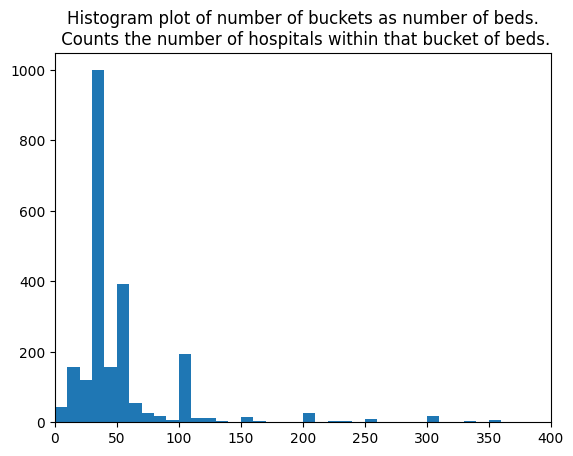

In [227]:
min_val = df["total_beds"].min()
max_val = df["total_beds"].max()
import numpy as np
bins = np.arange(min_val, max_val + 10, 10)
plt.xlim(0, 400)
plt.hist(df["total_beds"], bins=bins)
plt.title("Histogram plot of number of buckets as number of beds.\n Counts the number of hospitals within that bucket of beds.")
plt.savefig("img/maharashtra/histogram.png")


### District-wise number of Corporate hospitals, Government hospitals in Maharashtra

In [228]:
x = df.groupby('district_name').agg({
        "total_beds": "sum",
        "hospital_id": "count"
    })
x.rename(columns={'hospital_id': 'num_hospitals'}, inplace=True)
x

,total_beds,num_hospitals
district_name,,
AHILYANAGAR,8157,109
AKOLA,2420,44
AMRAVATI,3339,50
BEED,3674,65
BHANDARA,1450,25
BULDHANA,2838,72
CHANDRAPUR,1461,30
CHHATRAPATI SAMBHAJINAGAR,6703,101
DHARASHIV,1685,37


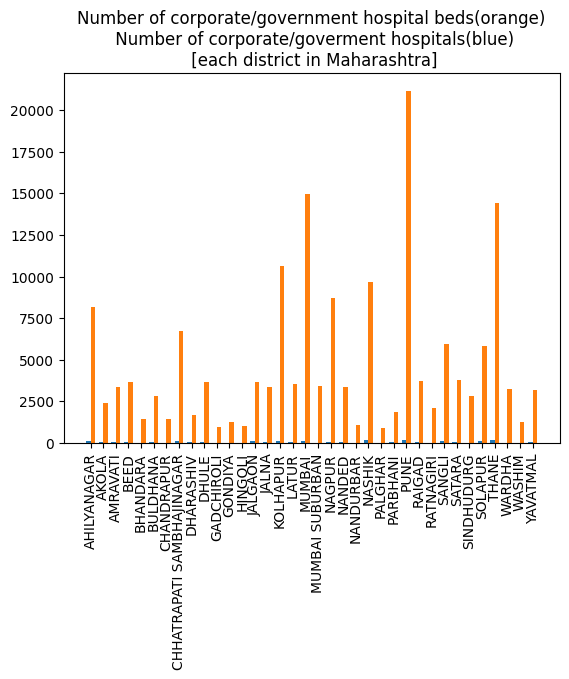

In [229]:
y = np.arange(len(x.index)) 
plt.bar(y - 0.35/2, x['num_hospitals'], width = 0.35)
plt.bar(y + 0.35/2, x['total_beds'], width = 0.35)
plt.xticks(y, x.index, rotation=90)
plt.title("Number of corporate/government hospital beds(orange)\n Number of corporate/goverment hospitals(blue)\n [each district in Maharashtra]")
plt.savefig("img/maharashtra/num_beds_corp_vs_govt.png")

## District-wise population of each state

In [ ]:
def dist_wise_popu(state):
    df = reqd.query(f'state_name == "{state}"')
    df = df.groupby('district').agg({
        "hospital_id": "count"
    })
    plt.figure(figsize=(12, 12))
    plt.xticks(rotation=45)
    
    plt.title("Population (as of 2011) in " + state)
    if len(df) == 1:
        plt.bar(df.index, df["total_persons"])
        plt.savefig("img/population_per_district_per_state/" + state + ".png")
        plt.close()
        return
    
    plt.bar(df.index, df["total_persons"])
    plt.savefig("img/population_per_district_per_state/" + state + ".png")
    plt.close()

In [ ]:
state_names = reqd["state_name"].unique()
for i in state_names:
    if pd.isna(i):
        continue
    dist_wise_popu(i)

## District-wise number of hospitals in each state

In [236]:
def dist_wise_popu(state):
    df = reqd.query(f'state_name == "{state}"')
    df = df.groupby('district').agg({
        "total_persons": "sum",
        "hospital_id": "count"
    })
    plt.figure(figsize=(12, 12))
    plt.xticks(rotation=45)
    
    plt.title("Number of hospitals in " + state + " (district-wise)")
    
    plt.bar(df.index, df["hospital_id"])
    plt.savefig("img/numHosp_per_district_per_state/" + state + ".png")
    plt.close()

In [237]:
state_names = reqd["state_name"].unique()
for i in state_names:
    if pd.isna(i):
        continue
    dist_wise_popu(i)

## Number of hospitals state-wise

In [243]:
y = dict(full_merge.groupby('state_name').count()['hospital_id'])
y

{'ANDAMAN AND NICOBAR ISLANDS': 5,
 'ANDHRA PRADESH': 2555,
 'ARUNACHAL PRADESH': 10,
 'ASSAM': 183,
 'BIHAR': 244,
 'CHANDIGARH': 60,
 'CHHATTISGARH': 439,
 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU': 798,
 'DELHI': 333,
 'GOA': 84,
 'GUJARAT': 3830,
 'HARYANA': 1670,
 'HIMACHAL PRADESH': 436,
 'JAMMU AND KASHMIR': 96,
 'JHARKHAND': 478,
 'KARNATAKA': 2230,
 'KERALA': 890,
 'LAKSHADWEEP': 1,
 'MADHYA PRADESH': 897,
 'MAHARASHTRA': 4840,
 'MANIPUR': 19,
 'MEGHALAYA': 62,
 'MIZORAM': 86,
 'NAGALAND': 14,
 'ODISHA': 718,
 'PUDUCHERRY': 47,
 'PUNJAB': 1201,
 'RAJASTHAN': 1209,
 'SIKKIM': 2,
 'TAMIL NADU': 2399,
 'TRIPURA': 41,
 'UTTAR PRADESH': 3186,
 'UTTARAKHAND': 390,
 'WEST BENGAL': 1152}

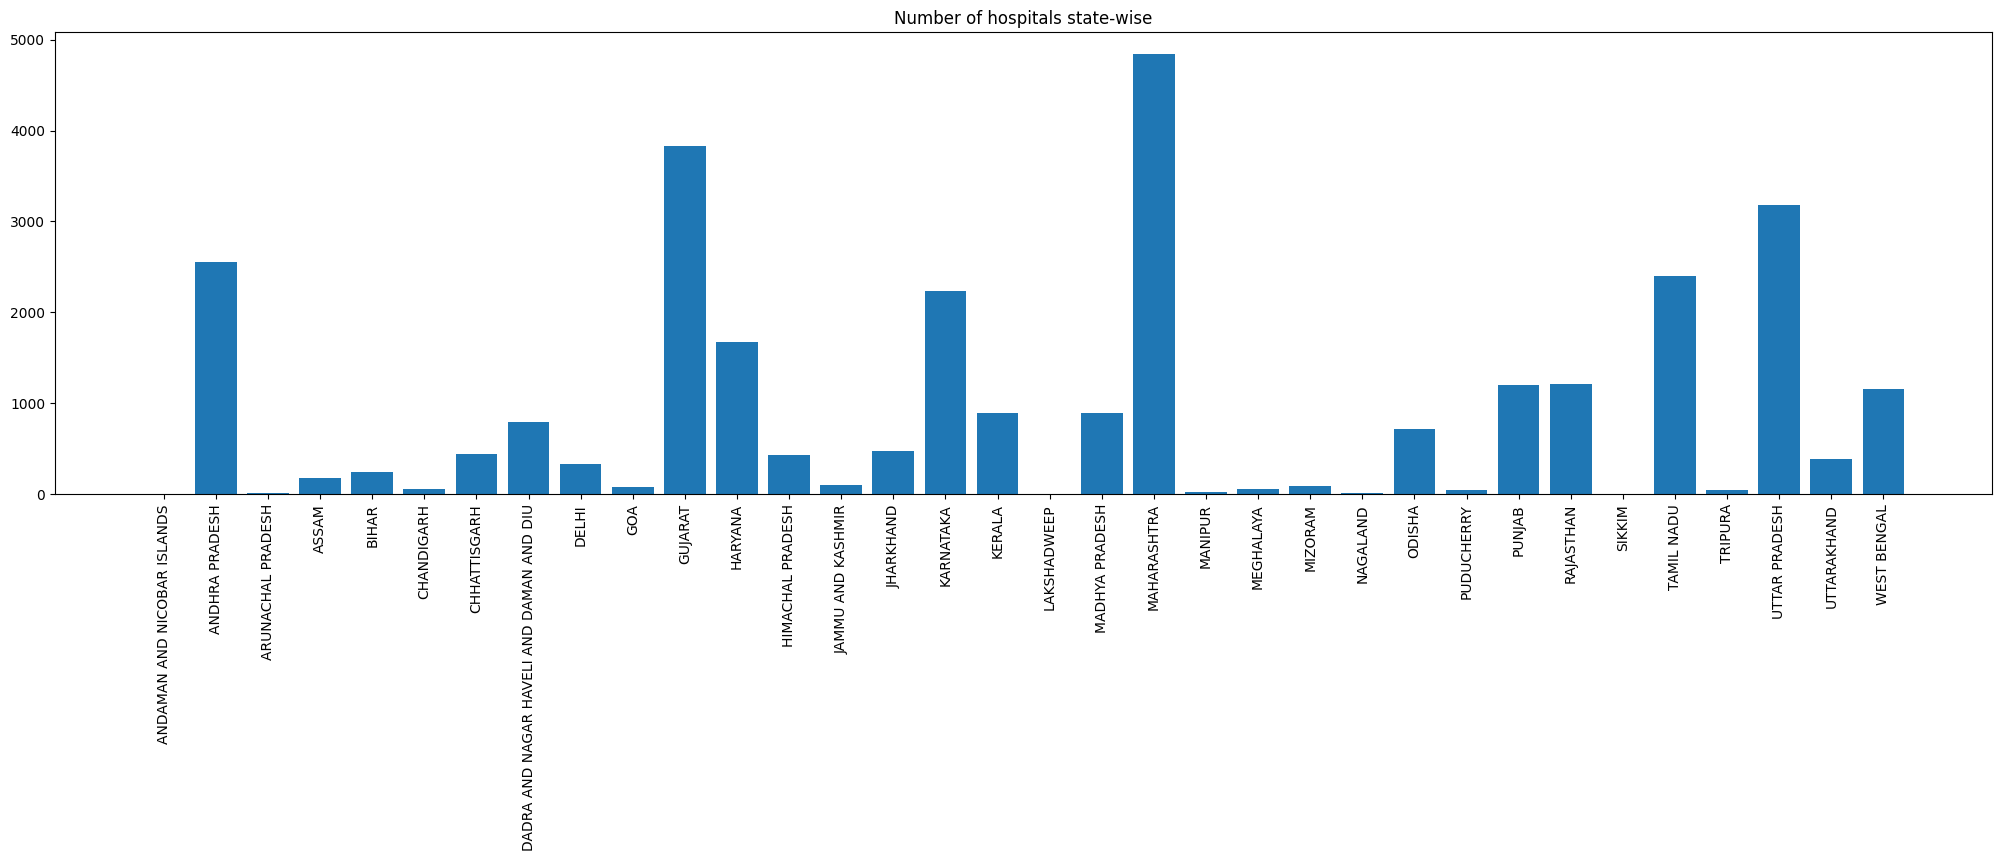

In [255]:
plt.figure(figsize=(25, 6))
plt.bar(y.keys(), y.values())
plt.title("Number of hospitals state-wise")
plt.xticks(rotation=90)
plt.savefig('num_hospitals_state_wise.png')